# Ads Click Through Optimization (Upper Confidence Bound Reinforcement Learning)

 ## Importing Libraries & dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
df=pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Dataset Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [9]:
df.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

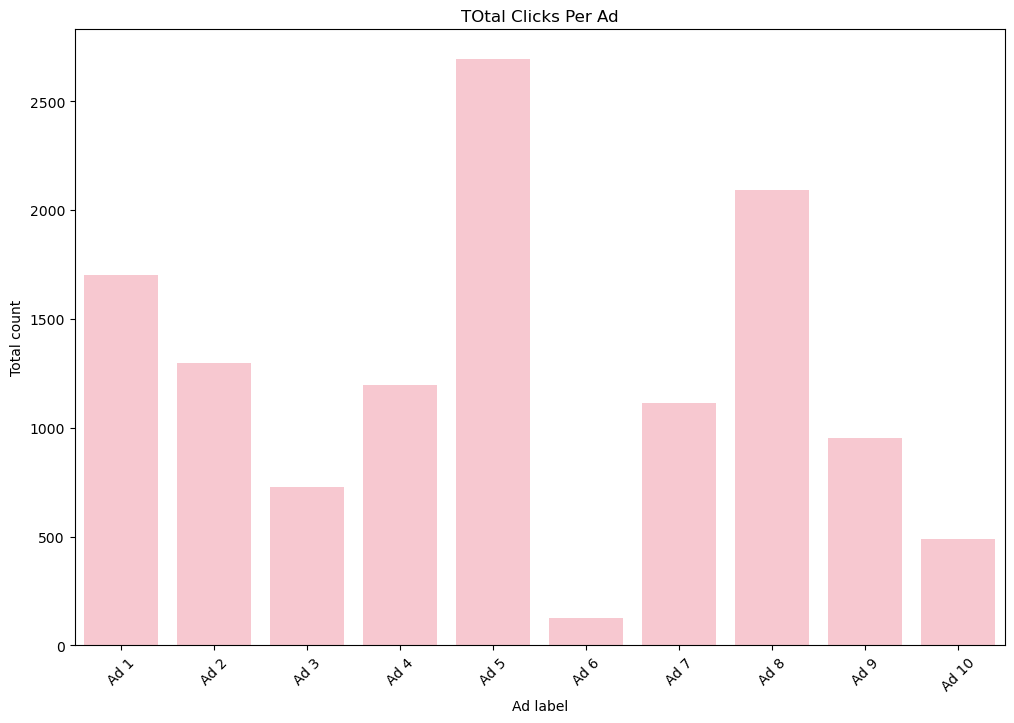

In [10]:
ad_sums=df.sum()
plt.figure(figsize=(12,8))
sns.barplot(x=ad_sums.index,y=ad_sums.values,color='pink')
plt.title('TOtal Clicks Per Ad')
plt.xlabel('Ad label')
plt.ylabel('Total count')
plt.xticks(rotation=45)
plt.show()

## Implementing UCB

### How Upper Confidence Bound works:

**UCB score** for each add consists of two parts, it adds up the **Exploration part** and the **Exploitation part**. The main goal for this algorithm is to see what's the best way to find out the ads which are most clicked by people and do it most efficiently. We need to do this in the best possible way, there are two paths :

1. **The Exploitation path**: Once the algorithm finds out the ad with the highest score, it exploits it to get an even higher score. The main                                     drawback of this path is it fails to find out other Ads with higher scores.
2. **The Exploration path**: Once the Ad finds the highest score, it also checks if other Ads have higher scores or not this could lose possible time.

### How UCB combines Exploration and Exploitation in the most optimal amount

The algorithm will assign a **UCB Score** to each Ad which is **The Uncertainity Bonus** + **The Average Reward**. 
**Exploration**:This score consists of **Confidence(or Uncertainity)** it tends to prioritize Ads which it has tested less compared to Ads which have been selected most of the time. **The Uncertainity Bonus** consits of  **whole root(1.5Logt/Ni(t))** where t is the number of rounds totally. Ni(t) is the number of times the Ad is chosen by the algorithm at that round depending on the UCB score.  
                            
**Exploitation**:The score also consists of the **Average Reward** (**Ui(t)=Ri(t)/Ni()**) where **Ri(t)**: is the total number of clicks we have recieved from Ad i until round (t). **Ni(t)** is the total number of times the Ad is chosen by the algorithm at that round depending on the UCB score.(at round 0 it is 0)

The main determiner is  **Ni(t)**, if it's small meaning the uncertainity bonus becomes large (since it's in the denominator). This encourages the algorithm to explore less chosen Ads. When Ni(t) is large then the algorithm is more confident on the Ad and the UCB score will depend more on ui(t) which is the average reward till turn t. 

**UCB= ui(t)+whole root(2/3Log(t)/Ni(t))**


In [11]:
import math
d=10
N=10000
ad_selected_per_iteration=[]
number_of_selections=[0]*d
sum_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(number_of_selections[i]>0):
            average_reward=sum_of_rewards[i]/number_of_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if(upper_bound>max_upper_bound):
                max_upper_bound=upper_bound
                ad=i
    ad_selected_per_iteration.append(ad)
    number_of_selections[ad]+=1
    sum_of_rewards[ad]+=df.values[n,ad]
    total_reward=total_reward+df.values[n,ad]
        

In [12]:
print(ad_selected_per_iteration)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

## Plotting the Ads' selected most by UCB

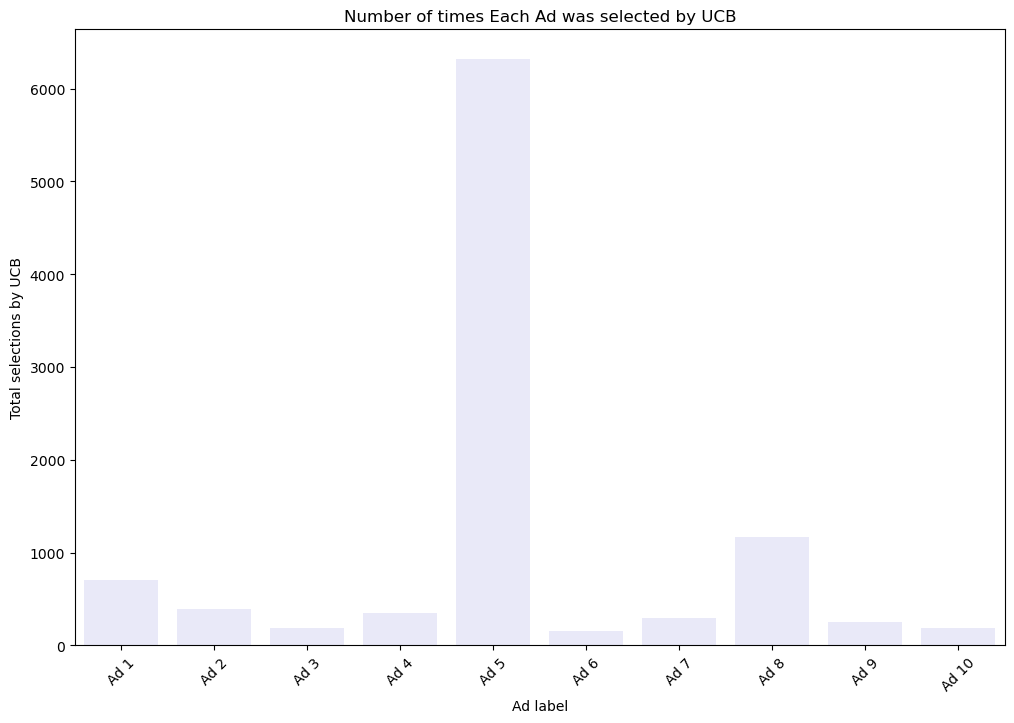

In [13]:

plt.figure(figsize=(12,8))
sns.barplot(x=ad_sums.index,y=number_of_selections,color='lavender')
plt.title('Number of times Each Ad was selected by UCB')
plt.xlabel('Ad label')
plt.ylabel('Total selections by UCB')
plt.xticks(rotation=45)
plt.show()

## Now since Ad 5 was selected and UCB iterated throught it aroudn 6000 times compared to the second most iterated which is Ad 8 with around 1200 times, We can definitely bring down the number of iterations before choosing the most appropriate Ad.

### Lets iterate the loop 5000 times now instead of 10000, even after 5000 times Ad 5 was chosen more than 2500 times with ad8 being chosen 800 times. I will test and note down the least amount of tries

In [28]:
import math
d1=10
N1=10000
ad_selected_per_iteration1=[]
number_of_selections1=[0]*d1
sum_of_rewards1=[0]*d1
total_reward1=0
for n in range(0,1000):
    ad1=0
    max_upper_bound1=0
    for i in range(0,d1):
        if(number_of_selections1[i]>0):
            average_reward1=sum_of_rewards1[i]/number_of_selections1[i]
            delta_i1=math.sqrt(3/2*math.log(n+1)/number_of_selections1[i])
            upper_bound1=average_reward1+delta_i1
        else:
            upper_bound1=1e400
        if(upper_bound1>max_upper_bound1):
                max_upper_bound1=upper_bound1
                ad1=i
    ad_selected_per_iteration1.append(ad1)
    number_of_selections1[ad1]+=1
    sum_of_rewards1[ad1]+=df.values[n,ad1]
    total_reward1=total_reward1+df.values[n,ad1]
        

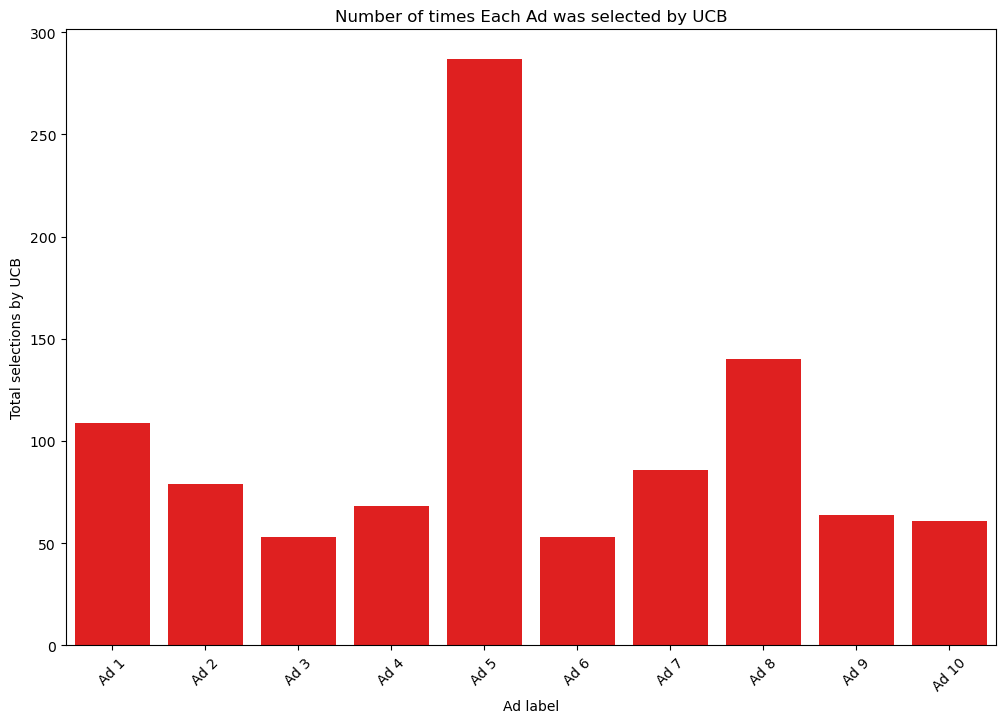

In [29]:

plt.figure(figsize=(12,8))
sns.barplot(x=ad_sums.index,y=number_of_selections1,color='red')
plt.title('Number of times Each Ad was selected by UCB')
plt.xlabel('Ad label')
plt.ylabel('Total selections by UCB')
plt.xticks(rotation=45)
plt.show()

**I ran the model for 500 iterations, At that point ad 5 and ad 8 were the same value.At thousand tries, Ad 5 was still predominantly chosen. Therefore the lowest number of rounds for us to figure out the most optimal ad is 1000**

##  Results and Conclusion

The final bar plot clearly visualizes the results of the Upper Confidence Bound (UCB) algorithm after 1,000 rounds.

### Key Findings

* **Clear Winner:** It is evident that **Ad 5** (the ad with the 'pink' bar) was selected exponentially more times than any other ad.

* **Exploration vs. Exploitation:** This plot perfectly demonstrates the UCB algorithm in action.

* **Exploration:** All other ads (Ad 1, 2, 3, 4, 6, 7, 8, 9, 10) were selected a small number of times. This was the "exploration" phase, where the algorithm "tested" each ad to see how well it performed.
  

* **Exploitation:** After a sufficient number of rounds, the algorithm became "confident" that Ad 5 had the highest click-through rate (CTR). It then began to "exploit" this knowledge by almost exclusively selecting Ad 5 to maximize the total reward.

### Final Business Recommendation

Based on this model, to maximize future ad clicks and revenue, the company should **predominantly (or exclusively) display Ad 5** to its users as a substantial amount of people click on it.